<a href="https://colab.research.google.com/github/RokonUZ/Handwritten_digit_recognition-/blob/main/Roman_CNN_keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
from keras.datasets import mnist
import tensorflow as tf



download mnist data and split them into train and test sets

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

data visualization 

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

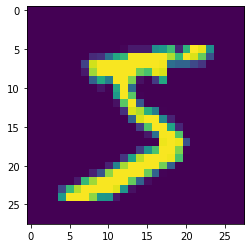

In [ ]:
import matplotlib.pyplot as plt

#%matplotlib inline

plt.imshow(xtrain[0])


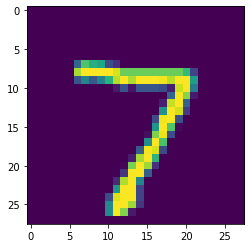

In [ ]:
plt.imshow(xtest[0])

In [ ]:
#feature scalling
xtrain=xtrain.astype("float32")/255
xtest=xtest.astype("float32")/255

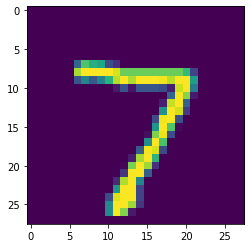

In [ ]:
plt.imshow(xtest[0])

In [ ]:
print(xtrain[0].max())

1.0


Data preprossesing 

now reshape (also make grayskale) the data that model expect 

In [ ]:
xtrain=xtrain.reshape(60000,28,28,1)  #1 for gray img
xtest=xtest.reshape(10000,28,28,1)  #1 for gray img








In [ ]:
xtrain[0].shape

(28, 28, 1)

Now do One hot encode target column 

In [ ]:

#from tensorflow import keras

#from keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical

#ytrain=to_categorical(ytrain)
#ytest=to_categorical(ytest)


#ytrain[0]







In [ ]:
from tensorflow.keras.utils import to_categorical #one-hot encode target column
ytrain = to_categorical(ytrain,dtype ="uint8")
ytest = to_categorical(ytest, dtype ="uint8")
ytrain[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

Now build our model 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten ,Dropout,MaxPool2D

#create model 
model=Sequential()

#convulation layer 1 
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
#convulation layer 2
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Dropout(rate=0.25))
#Flaten 
model.add(Flatten())



#Dense 
model.add(Dense(128,activation='softmax'))

model.add(Dropout(rate = 0.5))
model.add(Dense(10,activation='softmax'))





In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
from tensorflow.keras.optimizers import Adam
#Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Compiling the model



In [ ]:
from tensorflow.keras.metrics import categorical_crossentropy


model.compile(optimizer=optimizer , loss='categorical_crossentropy', metrics=['accuracy'])

train model 

In [ ]:

#history=model.fit(xtrain,ytrain,batch_size=128,epochs=10,verbose=1,validation_data=(xtest,ytest))



In [ ]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 184s 98ms/step - loss: 1.6946 - accuracy: 0.3963 - val_loss: 1.1338 - val_accuracy: 0.7035
Epoch 2/3
1875/1875 [==============================] - 182s 97ms/step - loss: 1.4097 - accuracy: 0.4474 - val_loss: 0.7828 - val_accuracy: 0.9508
Epoch 3/3
1875/1875 [==============================] - 182s 97ms/step - loss: 1.1310 - accuracy: 0.5995 - val_loss: 0.4156 - val_accuracy: 0.9823
